In [5]:
# Proyecto : Prediccion de Cancer de seno 
# Carlos Javier Reyes
import re

# Modelos y Aprendisaje
# ==============================================================================

from bs4 import BeautifulSoup as bs  # Lirerias para web scrapper 
import requests

import pandas as pd  # Librerias para Dataset
import numpy as np # Lbreria Numerical para computacion cientifica, analisis de datos

# Preprocesado y modelado
# ==============================================================================
# Librerias para Algoritmos de Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier







from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, plot_confusion_matrix

from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from imblearn.over_sampling import SMOTE, RandomOverSampler
from dtreeviz.trees import dtreeviz
import mglearn


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [6]:
def draw_tree(X, y, tree: DecisionTreeClassifier):
    viz = dtreeviz(tree, X, y,
                   target_name="Class",
                   feature_names=[str(x) for x in range(X.shape[1])],
                   class_names=list(map(str, list(set(y)))))
    return viz

In [7]:
def get_clf_name(clf):
    return re.sub('[^A-Za-z0-9]+', '', str(clf.__class__).split('.')[-1])

In [8]:
def run_experiment(X_train, y_train, X_test, y_test, clf):
    #clf = clf.copy()  # Anado esta linea por el principio Open-close de desarrollo de software (pero no es necesario) 
    
    print(get_clf_name(clf))
    clf.fit(X_train, y_train)
    
    # training confusion matrix
    y_pred = clf.predict(X_train)
    cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Accuracy Train: ", accuracy_score(y_train, y_pred))
    
    # test confusion matrix
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Accuracy Test: ", accuracy_score(y_test, y_pred))
    return disp

In [9]:
# Cancer
# ==============================================================================
# DataSet 
# cargar datos desde archivo de la pc

#df = pd.read_csv("E:\\maestria\\dataset\\wdbc.data",header=None)
df = pd.read_csv("./dataset/wdbc.data",header=None)


headers = ['id','diagnosis',
'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
'concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean',
'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se',
'concavity_se','concave_ points_se','symmetry_se','fractal_dimension_se',
'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst',
'concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst']
df.columns= headers
#1) ID number
#2) Diagnosis   Diagnosis (M = malignant, B = benign)
#   Las siguentes variables estan clasificadas internamente en 3 grupos de 10 : Mean , se , worst 
#	a) radius (mean of distances from center to points on the perimeter)
#	b) texture (standard deviation of gray-scale values)
#	c) perimeter
#	d) area
#	e) smoothness (local variation in radius lengths)
#	f) compactness (perimeter^2 / area - 1.0)
#	g) concavity (severity of concave portions of the contour)
#	h) concave points (number of concave portions of the contour)
#	i) symmetry 
#	j) fractal dimension ("coastline approximation" - 1)




In [10]:
print("Cantidad de datos y Nro de Col",df.shape ) # para saber Fil y Col del DataSet  569 filas y tiene 32 columnas
print("")
#Verifico el tipo de datos contenida en ambos dataset
print("Tipos de datos:",df.info())




Cantidad de datos y Nro de Col (569, 32)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null 

Cantidad por tipo de Diagnostico:  diagnosis
B    357
M    212
Name: diagnosis, dtype: int64


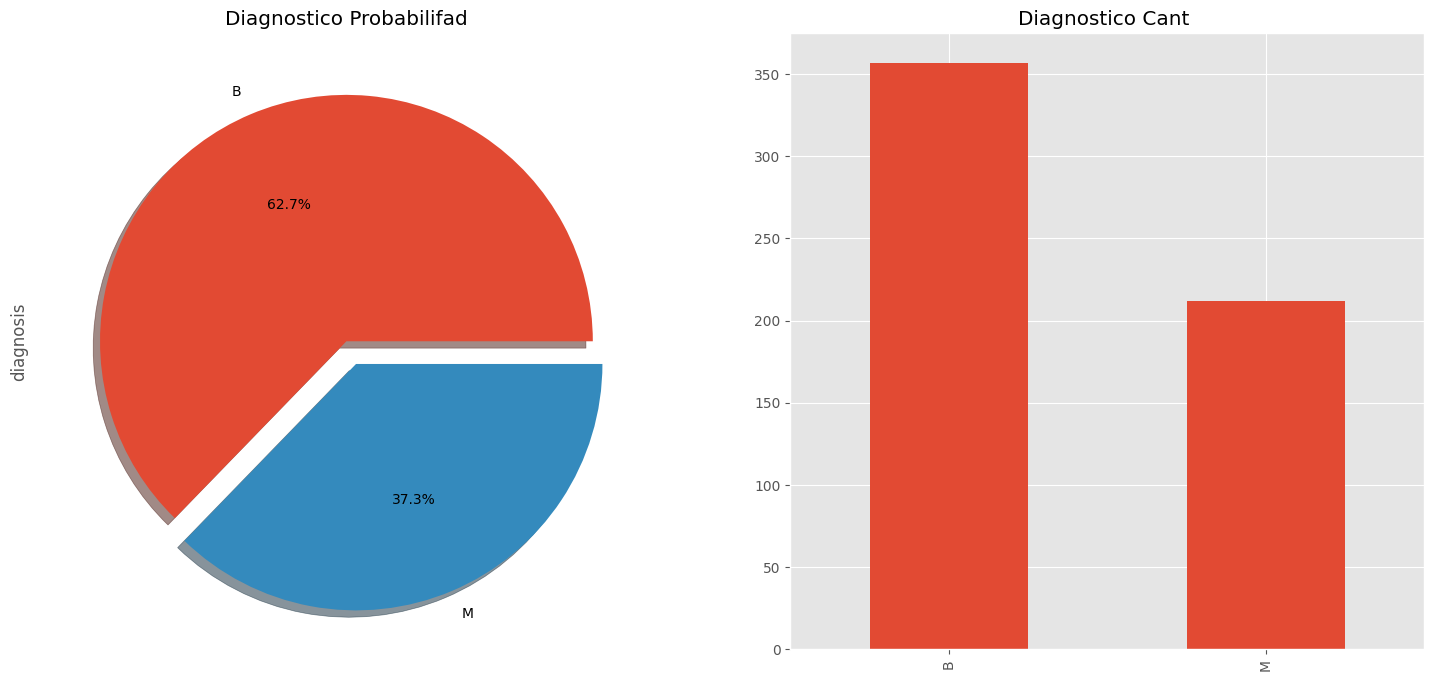

In [11]:
# isualizando la data con graficos
f , ax = plt.subplots (1,2, figsize = (18,8))

df.diagnosis.value_counts().plot.pie(autopct = '%1.1f%%',ax = ax[0],explode = [0,0.1],shadow = True)
ax[0].set_title('Diagnostico Probabilifad')

df.diagnosis.value_counts().plot.bar()
ax[1].set_title('Diagnostico Cant ')

print("Cantidad por tipo de Diagnostico: ",df.groupby(["diagnosis"]).diagnosis.count())
# 357 benignos , 212 malignos


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave_points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>],

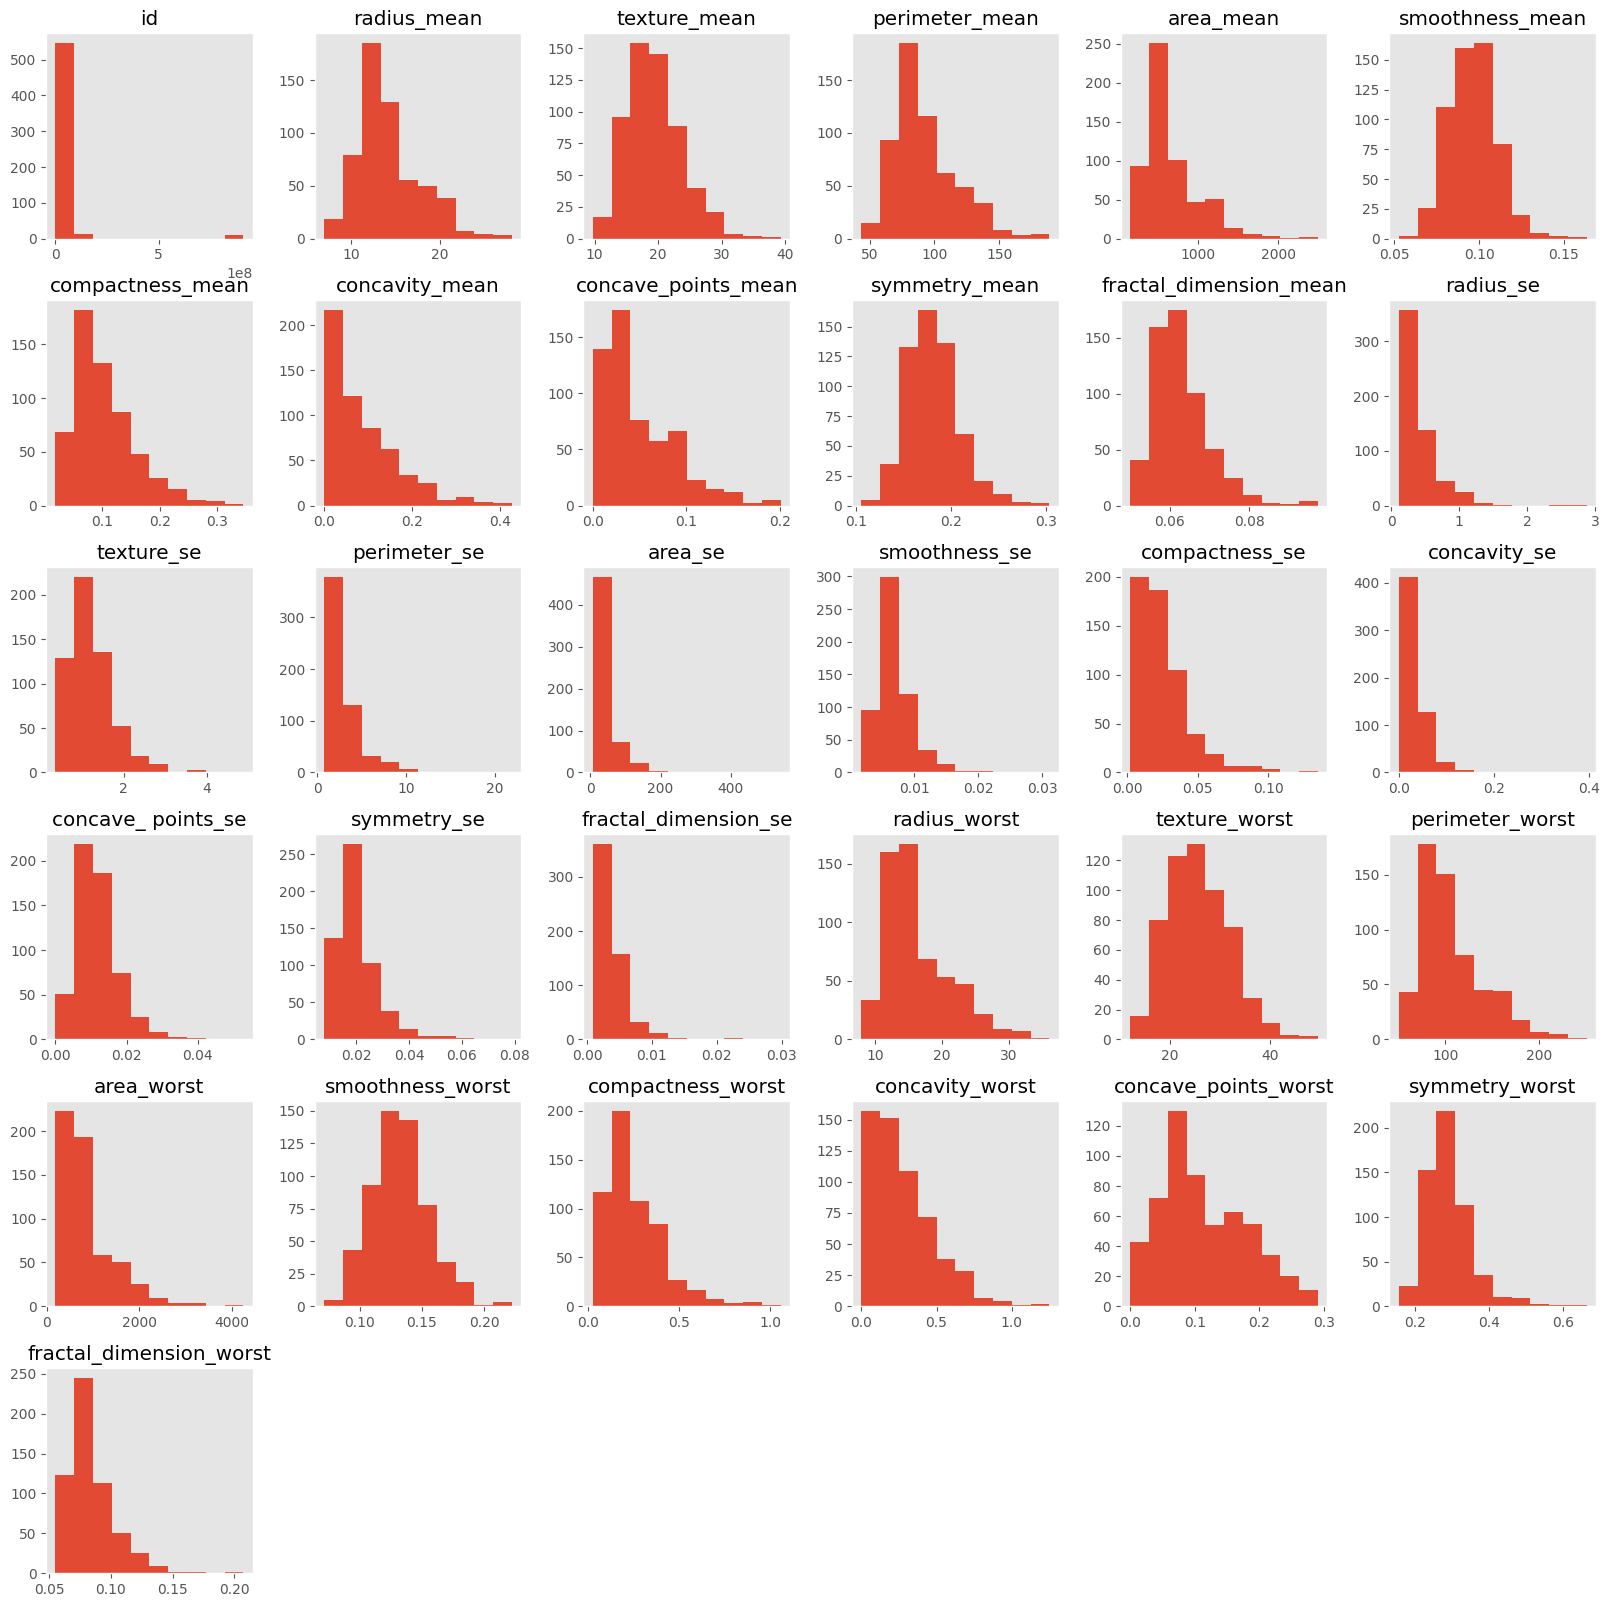

In [12]:
# Histograma
df.hist(bins=10,figsize=(20,20),grid=False)

In [13]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
# Validaciones
#Verifico si existen Nam
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave_points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave_ points_se         False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave_points_worst       False
symmetry_w

In [15]:
#Verifico si existen Nam
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [16]:
#Verifico el tipo de dato de la columna ID
df.id.value_counts().unique()


array([1], dtype=int64)

In [17]:
# Se revisa las estadisticas 
df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [18]:
# Limpieza de Campos
# Se actualiza campos String a numeros
cancer_mapping = {'B':0,'M':1}

df.diagnosis =  df.diagnosis.map(cancer_mapping)

df.diagnosis.replace(["M", "B"], [1, 0], inplace = True)



In [19]:
# Se elimina el campo ID que no aporta nada
df.drop('id',axis=1,inplace=True)

# Verificamos la eliminacion del campo
df.columns


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_ points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [20]:



x = df.select_dtypes(include=['float64'])
#x = df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
#'concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean',
#'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se',
#'concavity_se','concave_ points_se','symmetry_se','fractal_dimension_se',
#'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst',
#'concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst']]

y = df.diagnosis
#y = df['diagnosis']




<AxesSubplot:>

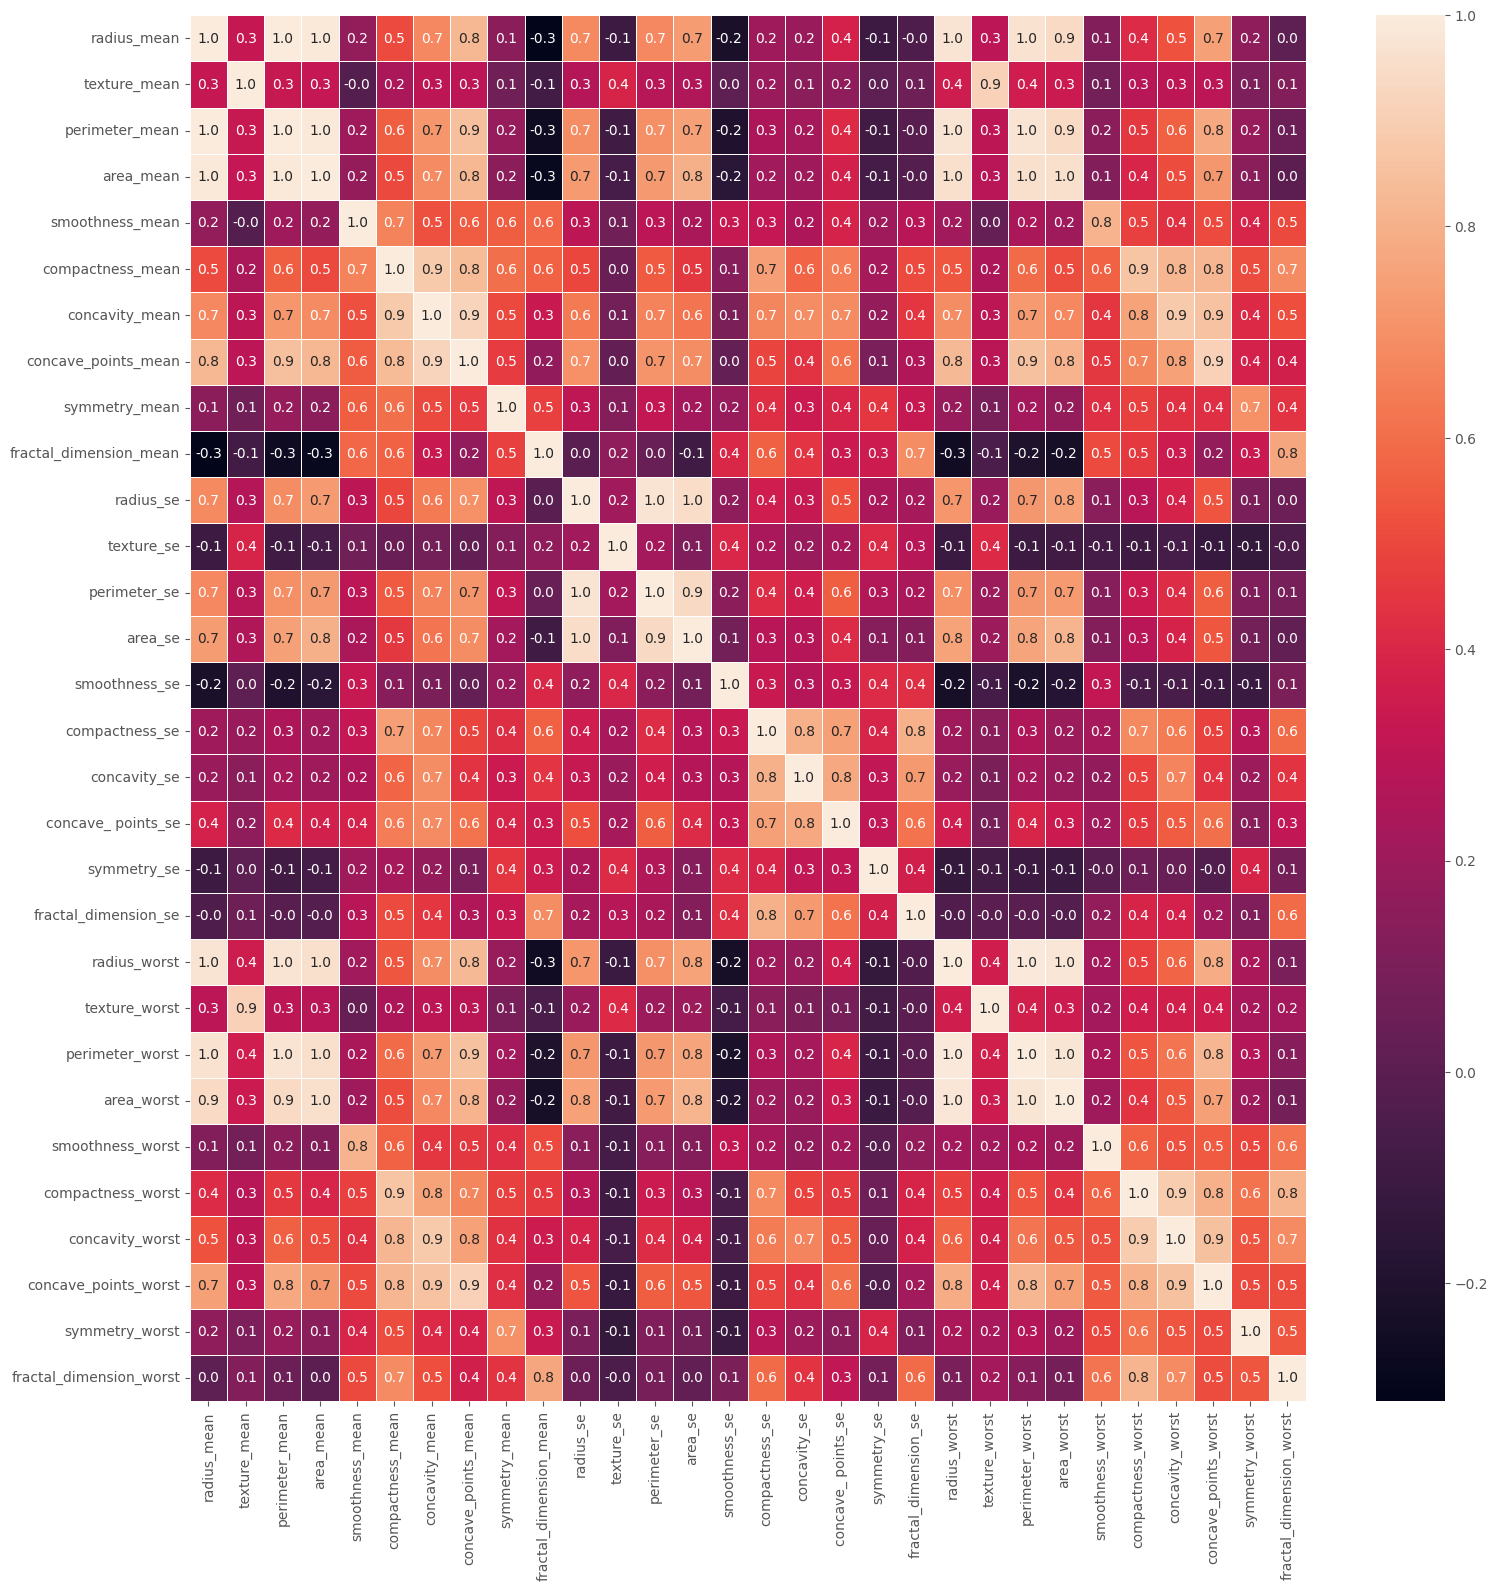

In [21]:
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(x.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

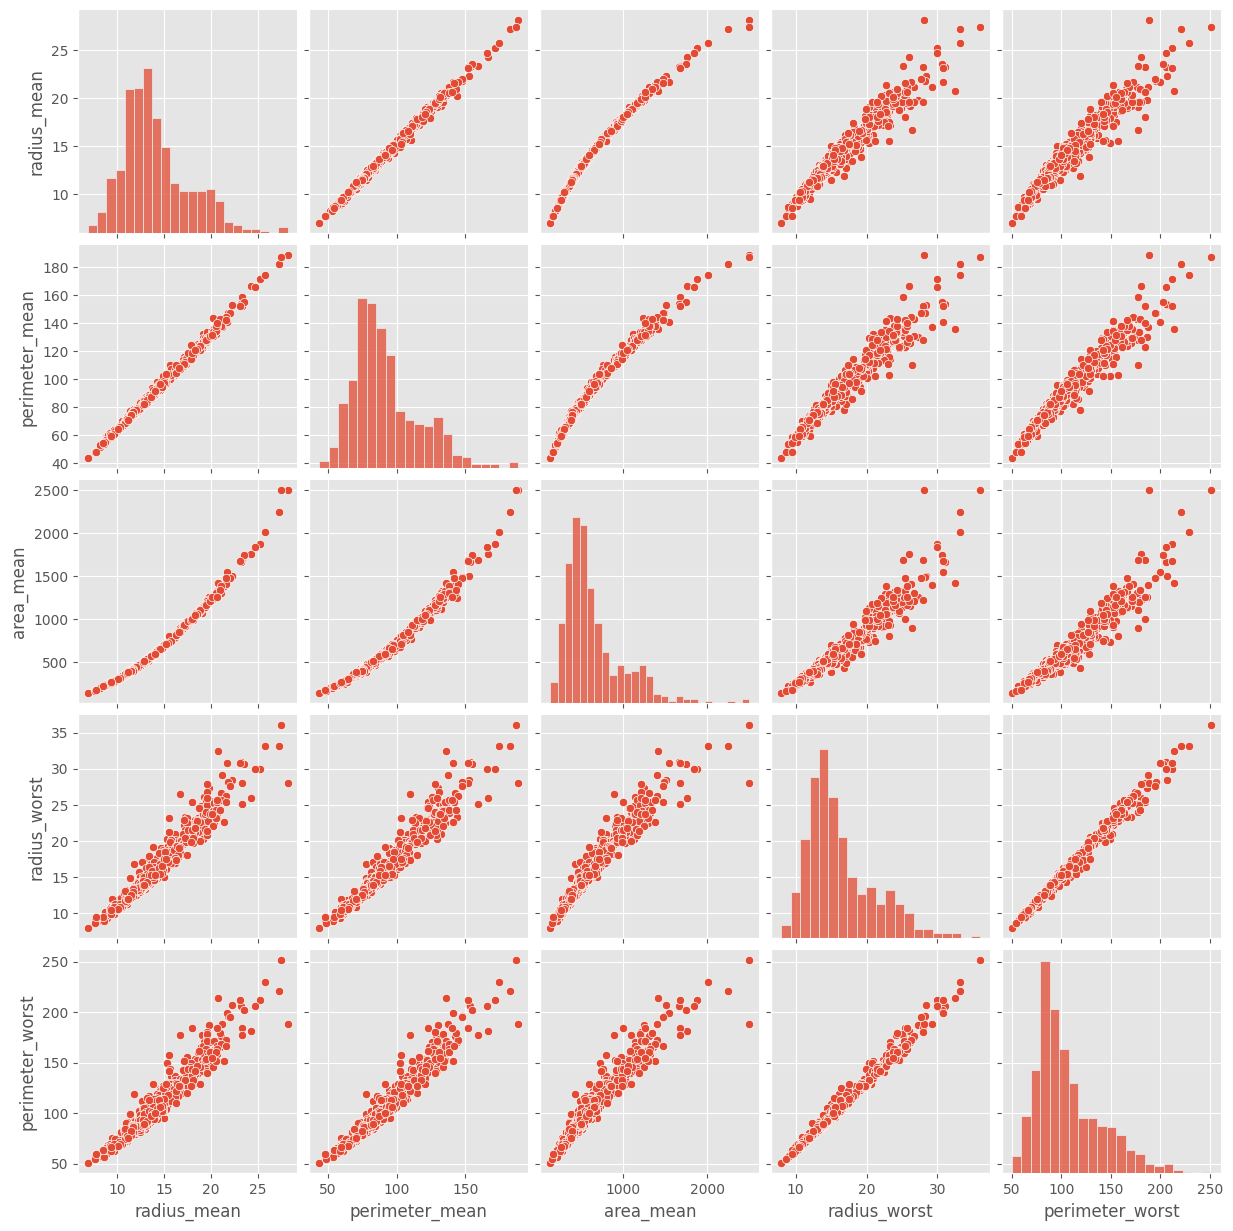

In [22]:
# Selecciono algunas variables para poder revisar algunos graficos
high_corr_pts = x[['radius_mean','perimeter_mean','area_mean','radius_worst','perimeter_worst']]

sns.pairplot(high_corr_pts)

In [23]:
# Matriz de correlación
# ==============================================================================
corr_matrix = x.corr(method='pearson')
corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [24]:

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)




In [25]:

tidy_corr_matrix(corr_matrix).head(10)


,variable_1,variable_2,r,abs_r
60,perimeter_mean,radius_mean,0.997855,0.997855
2,radius_mean,perimeter_mean,0.997855,0.997855
680,perimeter_worst,radius_worst,0.993708,0.993708
622,radius_worst,perimeter_worst,0.993708,0.993708
3,radius_mean,area_mean,0.987357,0.987357
90,area_mean,radius_mean,0.987357,0.987357
92,area_mean,perimeter_mean,0.986507,0.986507
63,perimeter_mean,area_mean,0.986507,0.986507
623,radius_worst,area_worst,0.984015,0.984015
710,area_worst,radius_worst,0.984015,0.984015


Text(0.5, 1.0, ' Analisis de X (30 variables)')

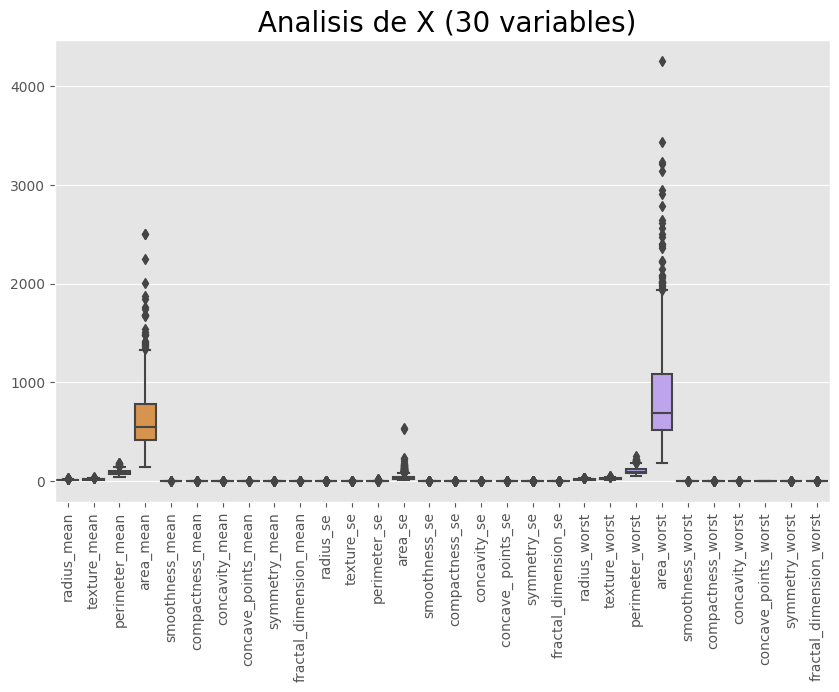

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=x)
plt.xticks(rotation = 90)
plt.title(" Analisis de X (30 variables)",fontsize=20)

In [27]:
# Al ser muchas variables con valores disparados preparamos los datos scalandolos para de alli poder usar pca 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
pd.DataFrame(x_scaled).describe()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Analisis de X Scaled (30 variables)')

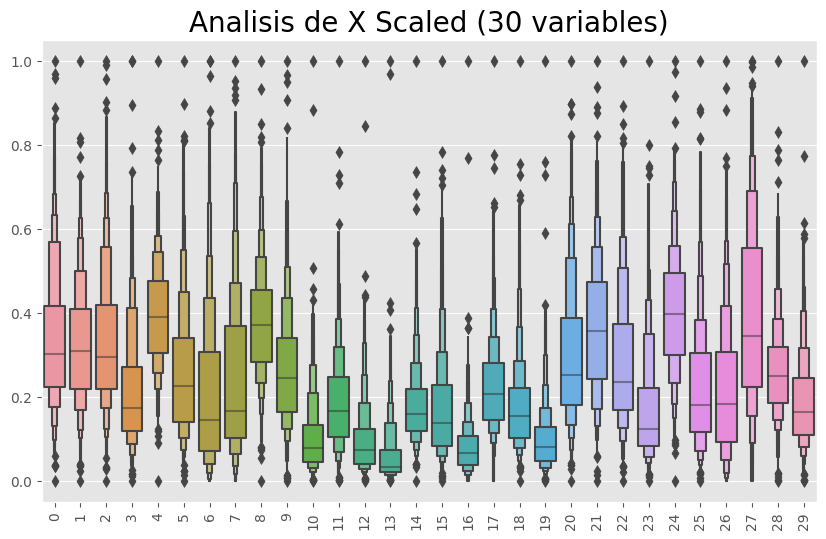

In [28]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=x_scaled)
plt.xticks(rotation = 90)
plt.title("Analisis de X Scaled (30 variables)",fontsize=20)

In [29]:
# Usamos el PCA sobre los scalados
pca = PCA(n_components=2)
pca.fit(x_scaled)

PCA(n_components=2)

In [30]:


x_pca = pca.transform(x_scaled)

pca_df = pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2'])


In [31]:
print(x_scaled.shape)
print(x_pca.shape)


(569, 30)
(569, 2)


Text(0.5, 1.0, 'Vista de Componentes X PCA (2 variables)')

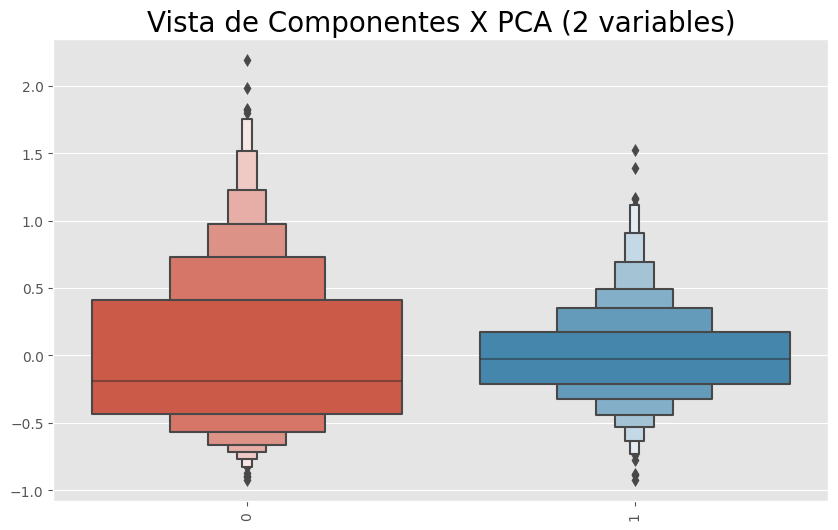

In [32]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=x_pca)
plt.xticks(rotation = 90)
plt.title("Vista de Componentes X PCA (2 variables)",fontsize=20)

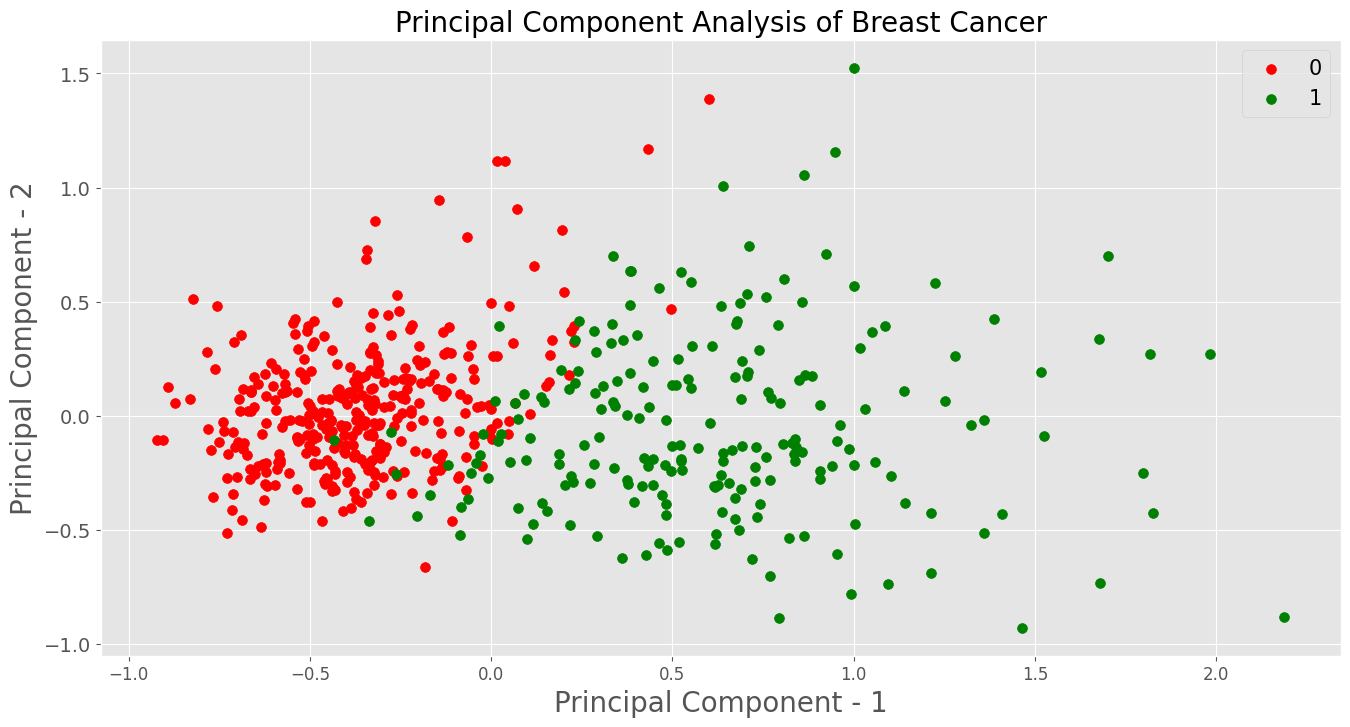

In [33]:

plt.figure(figsize=(16,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df.diagnosis == target
    plt.scatter( pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})





In [34]:
# Separando el modelo
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [35]:

X_test_copy = X_test.copy()
y_test_copy = y_test.copy()

# oversampler = SMOTE(sampling_strategy=0.4)
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversampler.fit_resample(X_train, y_train)
X_test, y_test = oversampler.fit_resample(X_test, y_test)

linear_clf = SGDClassifier(max_iter=1000, tol=1e-3)
knn_clf = KNeighborsClassifier (n_neighbors=1)
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier(max_depth=3)

clf = linear_clf

3


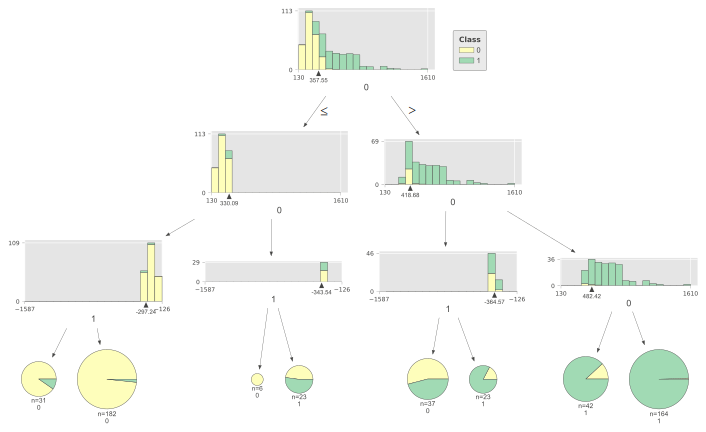

In [36]:
clf = DecisionTreeClassifier(max_depth=3)

clf.fit(pca.transform(X_train), y_train)
print(clf.get_depth())
viz = draw_tree(pca.transform(X_train), y_train, clf)
viz

DecisionTreeClassifier
Accuracy Train:  0.9803149606299213
Accuracy Test:  0.9271844660194175


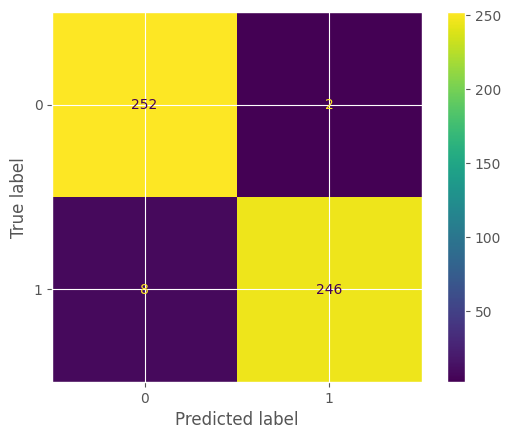

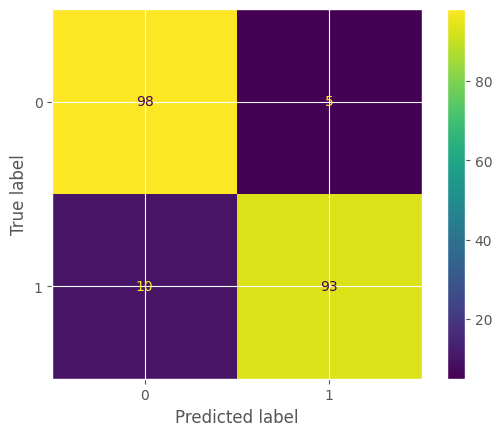

In [49]:
#MODELO 1 DecisionTreeClassifier
run_experiment(X_train, y_train, X_test, y_test, DecisionTreeClassifier(max_depth=3))
# Minimizar los falsos negativos
# 8/(246+8) Falsos Negativo 
# 0.9271844660194175  test

RandomForestClassifier
Accuracy Train:  0.9330708661417323
Accuracy Test:  0.8592233009708737


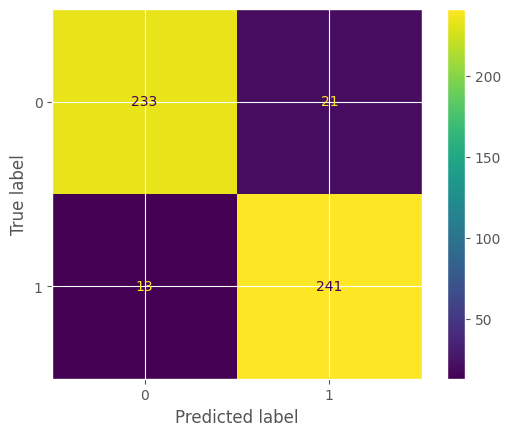

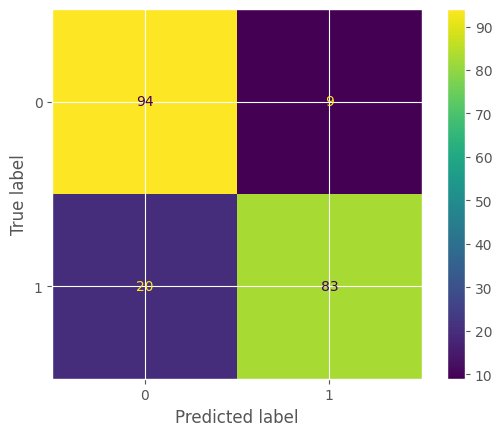

In [45]:
#MODELO 2 RandomForestClassifier
run_experiment(pca.transform(X_train), y_train, pca.transform(X_test), y_test, RandomForestClassifier(max_depth=3))
# Minimizar los falsos negativos
#13/(241+13) Falsos Negativo 
#  0.8592233009708737 test

SGDClassifier
Accuracy Train:  0.8799212598425197
Accuracy Test:  0.8640776699029126


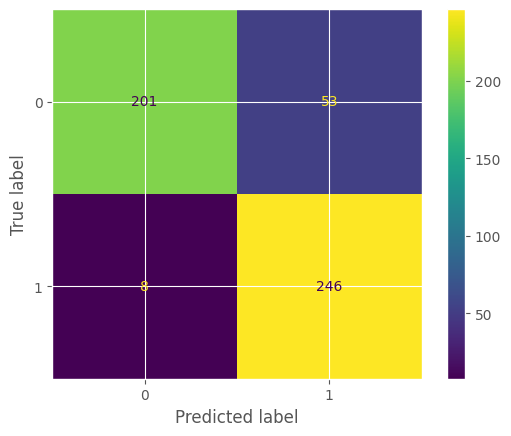

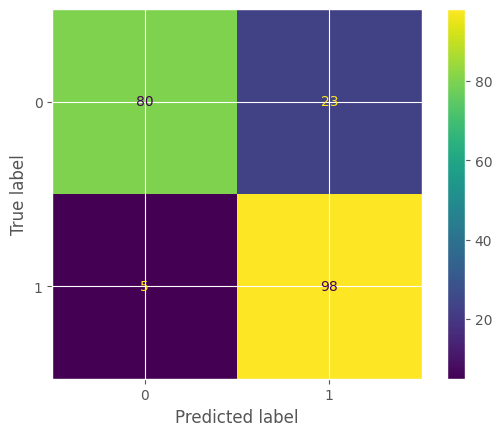

In [46]:
#MODELO 3 linear_clf
run_experiment(X_train, y_train, X_test, y_test, linear_clf)
# Minimizar los falsos negativos
#8/(246+8) Falsos Negativo 
#  0.8640776699029126

KNeighborsClassifier
Accuracy Train:  0.968503937007874
Accuracy Test:  0.9223300970873787


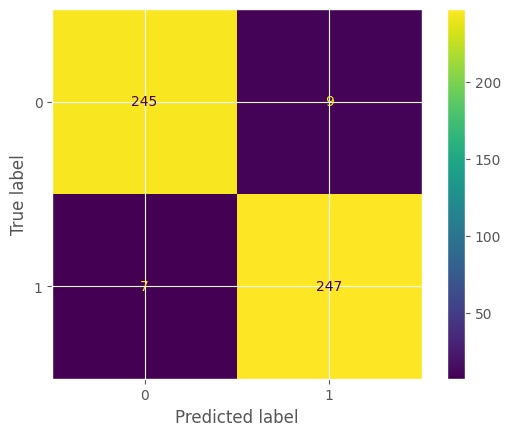

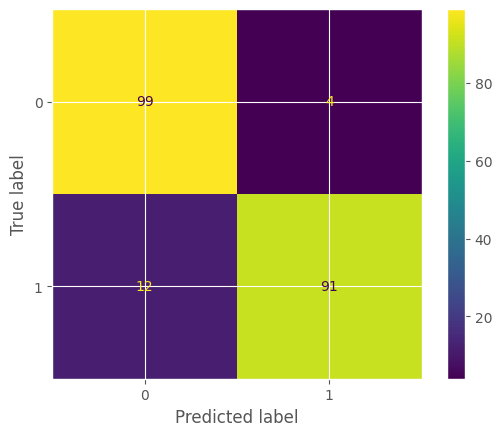

In [47]:
#MODELO 4 KNeighborsClassifier
run_experiment(X_train, y_train, X_test, y_test, KNeighborsClassifier (n_neighbors=3))
# Minimizar los falsos negativos
#7/(247+7) Falsos Negativo 
#  0.9223300970873787

In [80]:
models = ["DecisionTree","RandomForest","Linear","KNeighbors"]
values = [0.927,0.859,0.864,0.922]

Text(0, 0.5, 'Accuracies')

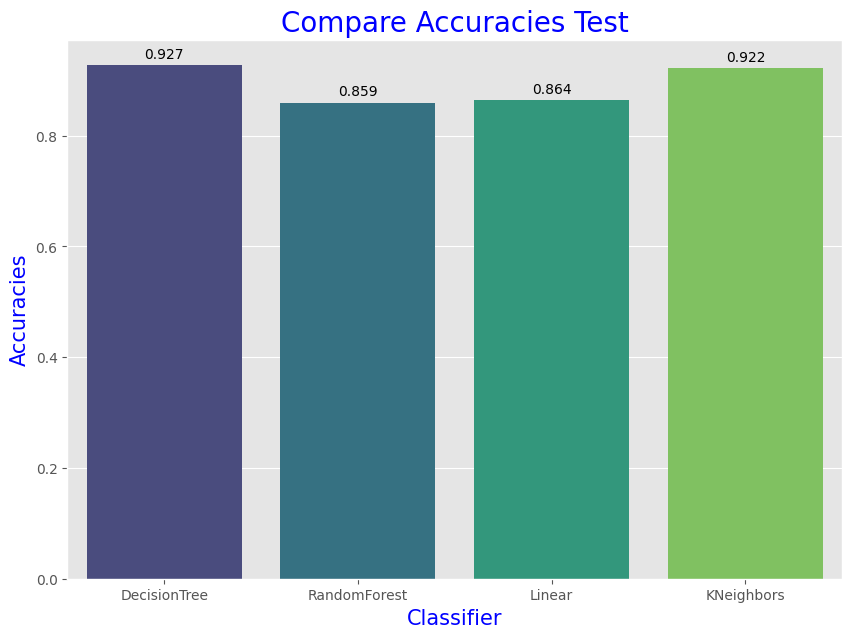

In [85]:
f,ax = plt.subplots(figsize = (10,7))
myplot = ax.bar(models,values,width=0.8,align='center')
sns.barplot(x=models, y=values,palette="viridis");
ax.bar_label (myplot,padding=3)
plt.title("Compare Accuracies Test",fontsize = 20,color='blue')
plt.xlabel('Classifier',fontsize = 15,color='blue')
plt.ylabel('Accuracies',fontsize = 15,color='blue')

In [89]:
models = ["DecisionTree","RandomForest","Linear","KNeighbors"]
values = [10,20,5,12]



Text(0, 0.5, 'Accuracies')

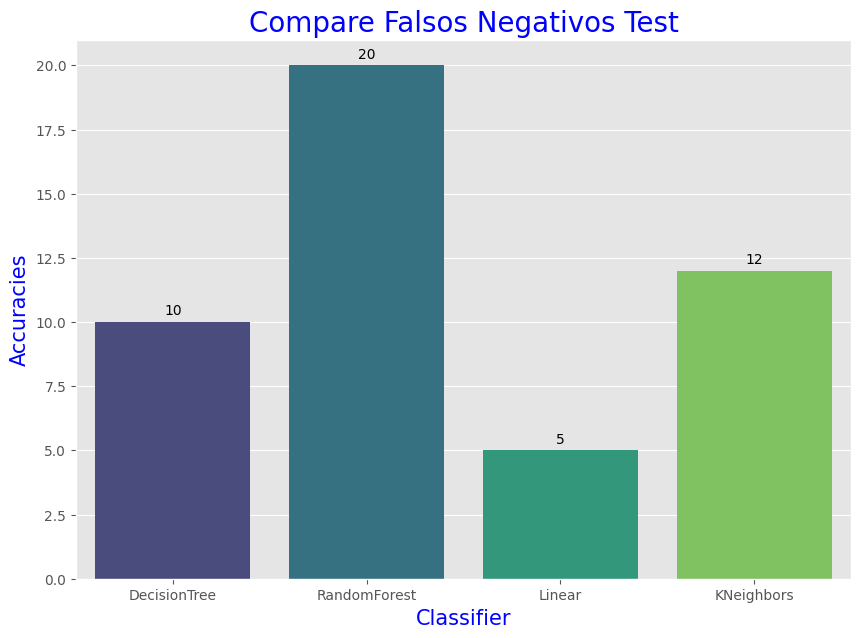

In [90]:

f,ax = plt.subplots(figsize = (10,7))
myplot = ax.bar(models,values,width=0.8,align='center')
sns.barplot(x=models, y=values,palette="viridis");
ax.bar_label (myplot,padding=3)
plt.title("Compare Falsos Negativos Test",fontsize = 20,color='blue')
plt.xlabel('Classifier',fontsize = 15,color='blue')
plt.ylabel('Accuracies',fontsize = 15,color='blue')
